In [11]:
# Import necessary libraries
from google.colab import drive  # Library for connecting to Google Drive
import cv2
import zipfile
import numpy as np
from PIL import Image
import io
from tabulate import tabulate
import warnings
import shutil
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
import matplotlib.cm as cm

# Define the path to the zip file and the extraction folder
zip_file_path = '/content/drive/MyDrive/002__DISSERTATION/DATASET/images/sample.zip'
extract_folder = 'extracted_content/'

# Mount Google Drive to access files
drive.mount("/content/drive", force_remount=True)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)



Mounted at /content/drive


In [18]:
# Create folders if they don't exist
if os.path.exists('Original_Folder'):
    shutil.rmtree('Original_Folder')
os.makedirs('Original_Folder')


# Create folders if they don't exist
if os.path.exists('Normalized_Folder'):
    shutil.rmtree('Normalized_Folder')
os.makedirs('Normalized_Folder')


# Initialize lists to hold statistics for each image
original_pixel_mean = []
original_pixel_sum = []
original_pixel_hist = []

normalized_pixel_mean = []
normalized_pixel_sum = []
normalized_pixel_hist = []

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if file_info.filename.endswith(('.png', '.jpg', '.jpeg')):
            with zip_ref.open(file_info.filename) as img_file:
                file_data = np.asarray(bytearray(img_file.read()), dtype=np.uint8)
                img     = cv2.imdecode(file_data, cv2.IMREAD_COLOR)
                img_old = img

                # Save the original image
                original_image_path = os.path.join('Original_Folder', file_info.filename.split('/')[-1])
                cv2.imwrite(original_image_path, img)

                # Perform normalization
                normalized_img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

                # Save the normalized image
                normalized_image_path = os.path.join('Normalized_Folder', file_info.filename.split('/')[-1])
                cv2.imwrite(normalized_image_path, (normalized_img * 255).astype(np.uint8))  # Convert to 8-bit before saving

                # Calculate statistics for each Old image
                old_img_mean = np.mean(img_old)
                old_img_sum = np.sum(img_old)
                old_hist_values = np.histogram(img_old, bins=20)[0]

                # Calculate statistics for each Normalised image
                norm_img_mean = np.mean(normalized_img)
                norm_img_sum = np.sum(normalized_img)
                norm_hist_values = np.histogram(normalized_img, bins=20)[0]

                # Append statistics to Old Image lists
                original_pixel_mean.append(old_img_mean)
                original_pixel_sum.append(old_img_sum)
                original_pixel_hist.append(old_hist_values)

                # Append statistics to Normalised lists
                normalized_pixel_mean.append(norm_img_mean)
                normalized_pixel_sum.append(norm_img_sum)
                normalized_pixel_hist.append(norm_hist_values)

In [16]:
# Function to Analysis Inidiual Image
# Use on Original Image and Normailize Image at the same Time.
def plot_color_distribution(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Separate RGB channels
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    # Create subplots
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Display original image
    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')  # Hide axes

    # Plot distribution for Red channel
    axs[1].hist(red_channel.ravel(), bins=256, color='red')
    axs[1].set_title('Red Channel')
    axs[1].set_xlim([0, 256])

    # Plot distribution for Green channel
    axs[2].hist(green_channel.ravel(), bins=256, color='green')
    axs[2].set_title('Green Channel')
    axs[2].set_xlim([0, 256])

    # Plot distribution for Blue channel
    axs[3].hist(blue_channel.ravel(), bins=256, color='blue')
    axs[3].set_title('Blue Channel')
    axs[3].set_xlim([0, 256])

    plt.show()


# Example usage:
# plot_color_distribution('path/to/your/image.jpg')


# Script is to show Original and Normalised Image
import cv2
import matplotlib.pyplot as plt

def visualize_before_after(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Perform normalization
    normalized_img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Display original image
    axs[0].imshow(img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')  # Hide axes

    # Display normalized image
    axs[1].imshow(normalized_img)
    axs[1].set_title('Normalized Image')
    axs[1].axis('off')  # Hide axes

    plt.show()

# Example usage:
# visualize_before_after('path/to/your/image.jpg')



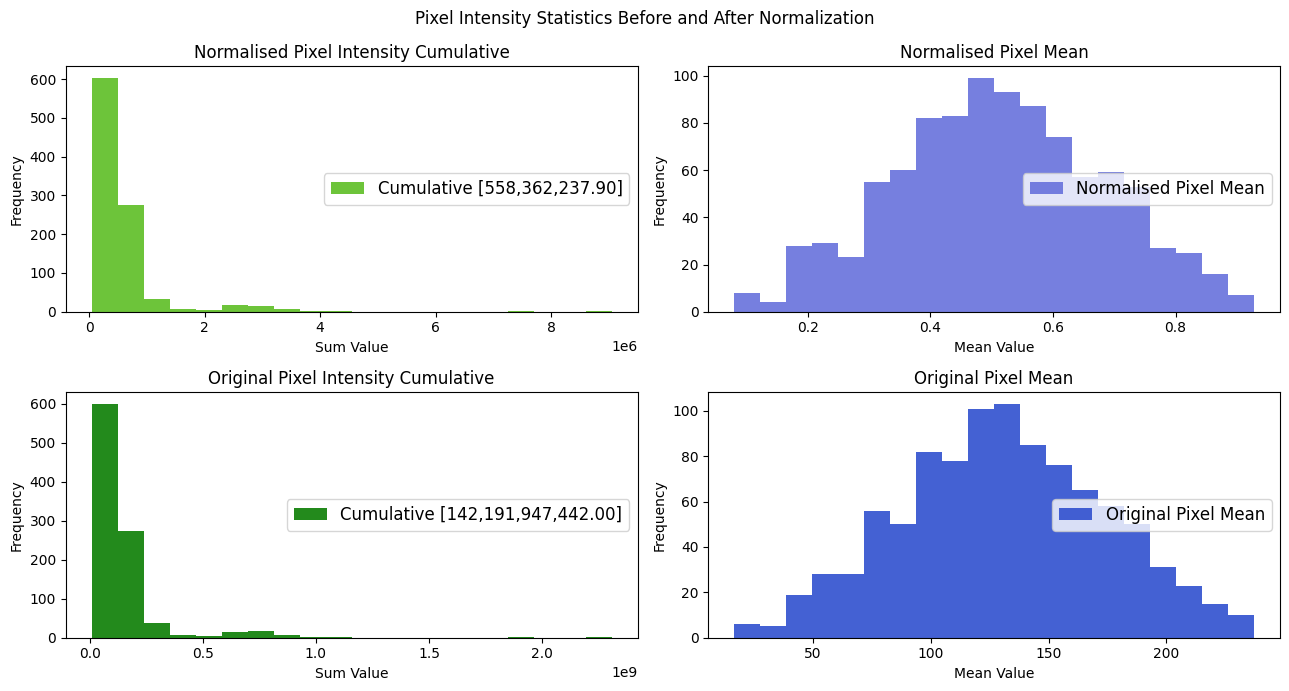

In [45]:
# ... (previous code)

# Plotting the graphs
fig, axes = plt.subplots(2, 2, figsize=(13, 7))
fig.suptitle('Pixel Intensity Statistics Before and After Normalization')
sum_nor  = "{:,.2f}".format(sum(normalized_pixel_sum))
sum_old  = "{:,.2f}".format(sum(original_pixel_sum))


# Plot normalized_pixel_hist (histogram for one image)

# Plot normalized_pixel_sum
axes[0, 0].hist(normalized_pixel_sum, bins=20, color='#5dbe24', alpha=0.9, label=f'Cumulative [{sum_nor}]')
axes[0, 0].set_title('Normalised Pixel Intensity Cumulative')
axes[0, 0].set_xlabel('Sum Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend(loc='center right', fontsize=12)

# Plot normalized_pixel_mean
axes[0, 1].hist(normalized_pixel_mean, bins=20, color='#6771dc', alpha=0.9, label='Normalised Pixel Mean')
axes[0, 1].set_title('Normalised Pixel Mean')
axes[0, 1].set_xlabel('Mean Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend(loc='center right', fontsize=12)


# Plot original_pixel_hist (histogram for one image)

# Plot original_pixel_sum
axes[1, 0].hist(original_pixel_sum, bins=20, color='#0b7d03', alpha=0.9, label=f'Cumulative [{sum_old}]')
axes[1, 0].set_title('Original Pixel Intensity Cumulative')
axes[1, 0].set_xlabel('Sum Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(loc='center right', fontsize=12)

# Plot original_pixel_mean
axes[1, 1].hist(original_pixel_mean, bins=20, color='#3050cf', alpha=0.9, label='Original Pixel Mean')
axes[1, 1].set_title('Original Pixel Mean')
axes[1, 1].set_xlabel('Mean Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(loc='center right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
######    # Normalization of Images (NOTE: THE GREYSCALE IMAGES ARE TO BE NORMALIZED TOO)
######
######    # define a load function
######    def image_generator(zip_file_path):
######        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
######            for file_info in zip_ref.infolist():
######                if file_info.filename.endswith(('.png', '.jpg', '.jpeg')):
######                    with zip_ref.open(file_info.filename) as img_file:
######                        file_data = np.asarray(bytearray(img_file.read()), dtype=np.uint8)
######                        img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)
######                        yield img
######
######
######    # Initialize an empty list to hold the normalized images
######    normalized_images = []
######
######    # Process images one by one using the generator
######    for img in image_generator(zip_file_path):
######        # Perform your image processing here
######        # Perform normalization
######        normalized_img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
######
######        # Append the normalized image to the list
######        normalized_images.append(normalized_img)
######        pass